<a href="https://colab.research.google.com/github/miagna/edem-clase-git/blob/master/Practica1_GBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

TensorFlow 2.x selected.


In [2]:
!gdown --id 1xaxrs8D1NmVnKPnO6CFjFXjJhnzXY1ML --output PJME_hourly.csv

/tensorflow-2.1.0/python3.6/pkg_resources/py2_warn.py:22: UserWarning: Setuptools will stop working on Python 2
************************************************************
You are running Setuptools on Python 2, which is no longer
supported and
>>> SETUPTOOLS WILL STOP WORKING <<<
in a subsequent release (no sooner than 2020-04-20).
Please ensure you are installing
Setuptools using pip 9.x or later or pin to `setuptools<45`
in your environment.
If you have done those things and are still encountering
this message, please comment in
https://github.com/pypa/setuptools/issues/1458
about the steps that led to this unsupported combination.
************************************************************
  sys.version_info < (3,) and warnings.warn(pre + "*" * 60 + msg + "*" * 60)
Downloading...
From: https://drive.google.com/uc?id=1xaxrs8D1NmVnKPnO6CFjFXjJhnzXY1ML
To: /content/PJME_hourly.csv
4.07MB [00:00, 128MB/s]


In [5]:
df = pd.read_csv('PJME_hourly.csv',
                 parse_dates=['Datetime'],
                 index_col='Datetime')
df.shape

(145366, 1)

In [6]:
df.head()

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0


In [0]:
# Create new features from the time field
def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    df['timestamp'] = df.index
    df['hour'] = df['timestamp'].dt.hour
    df['dayofweek'] = df['timestamp'].dt.dayofweek
    df['month'] = df['timestamp'].dt.month
    df['year'] = df['timestamp'].dt.year
    df['dayofyear'] = df['timestamp'].dt.dayofyear
    df['dayofmonth'] = df['timestamp'].dt.day
    df['weekofyear'] = df['timestamp'].dt.weekofyear
    
    X = df[['hour','dayofweek','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

In [26]:
TRAIN_SPLIT=30000
multi_data = df[['PJME_MW']]
multi_data.head()

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0


In [27]:
# Creating and splitting the data
multi_data_train = multi_data[:TRAIN_SPLIT]
multi_data_test = multi_data[TRAIN_SPLIT:]
X_train, y_train = create_features(multi_data_train, label='PJME_MW')
X_test, y_test = create_features(multi_data_test, label='PJME_MW')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/s

In [28]:
X_train.head()

,hour,dayofweek,month,year,dayofyear,dayofmonth,weekofyear
Datetime,,,,,,,
2002-12-31 01:00:00,1,1,12,2002,365,31,1
2002-12-31 02:00:00,2,1,12,2002,365,31,1
2002-12-31 03:00:00,3,1,12,2002,365,31,1
2002-12-31 04:00:00,4,1,12,2002,365,31,1
2002-12-31 05:00:00,5,1,12,2002,365,31,1


In [29]:
y_train.head()

Datetime
2002-12-31 01:00:00    26498.0
2002-12-31 02:00:00    25147.0
2002-12-31 03:00:00    24574.0
2002-12-31 04:00:00    24393.0
2002-12-31 05:00:00    24860.0
Name: PJME_MW, dtype: float64

In [30]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[15:20:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

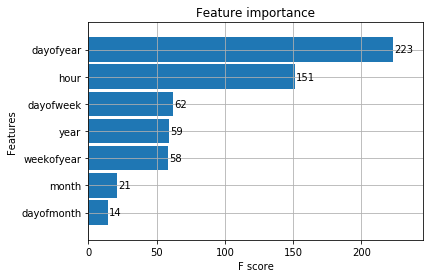

In [31]:
# Plot the most important features
_ = plot_importance(reg, height=0.9)

In [32]:
multi_data_test['Prediction'] = reg.predict(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


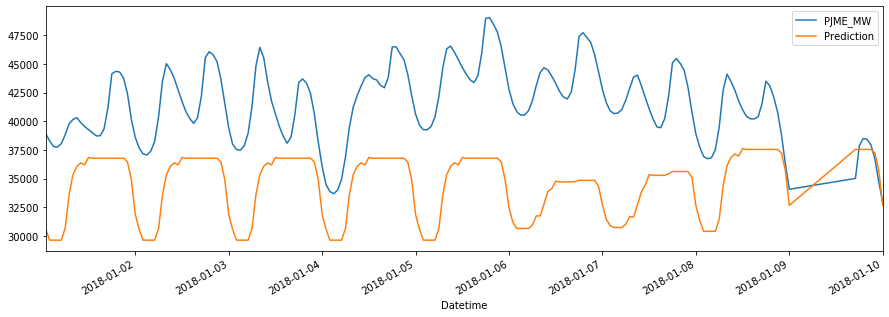

In [33]:
multi_data_test[-200:][['PJME_MW','Prediction']].plot(figsize=(15, 5))

In [35]:
mean_squared_error(y_true=multi_data_test['PJME_MW'],
                   y_pred=multi_data_test['Prediction'])

15598846.918641202

In [36]:
mean_absolute_error(y_true=multi_data_test['PJME_MW'],
                   y_pred=multi_data_test['Prediction'])

3137.949401998314